In [11]:
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np
from astropy.timeseries import LombScargle
%matplotlib inline

In [12]:
#First define some input parameters for the signal:
#
A = 2.
w = 1.
phi = 0.5 * np.pi
nin = 1000
nout = 1000
frac_points = 0.9 # Fraction of points to select

#Randomly select a fraction of an array with timesteps:
r = np.random.rand(nin)
x = np.linspace(0.01, 10*np.pi, nin)
dx=x[1]-x[0]
x = x[r >= frac_points]
print(x[len(x)-1],len(x))

31.195864988599347 100


In [13]:
#Plot a sine wave for the selected times:

y = A * np.sin(w*x+phi)

# Define the array of frequencies for which to compute the periodogram:
min_fraq=1./x[len(x)-1]
max_fraq=1./(2.*dx)
#f = np.linspace(0.01, 4., nout)
f = np.linspace(min_fraq, max_fraq, nout)

#Calculate Lomb-Scargle periodogram:
#pgram = signal.lombscargle(x, y, f, normalize=False)
pgram = signal.lombscargle(x, y, f,normalize=True)


In [21]:
#dy=0.1
frequency, power = LombScargle(x,y,dy).autopower()
print(len(frequency),len(power))

1251 1251


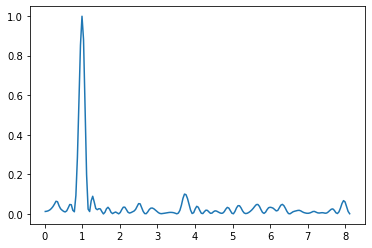

In [23]:
plt.plot(2.*np.pi*frequency[:200], power[:200])  